<a href="https://colab.research.google.com/github/Naresh501/YBI_project/blob/master/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING**

In [ ]:
!pip install klib

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df=pd.read_csv('/content/eluru_weather_data_with_category.csv')

In [ ]:
df.head()

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max,Weather_Category
0,01-01-2010,1,30.237000,19.286999,24.249498,30.686665,21.636540,0.0,0.0,0,10.464797,Sunny
1,02-01-2010,2,28.437000,18.737000,23.626585,30.023281,20.517824,0.0,0.0,0,10.703569,Sunny
2,03-01-2010,1,28.536999,17.587000,22.976580,30.546078,19.006292,0.0,0.0,0,8.496305,Sunny
3,04-01-2010,0,29.286999,17.937000,23.399496,31.184177,19.666264,0.0,0.0,0,9.726664,Sunny
4,05-01-2010,1,31.137000,17.786999,24.034914,32.176640,19.056711,0.0,0.0,0,13.044722,Sunny


In [ ]:
import klib

GridSpec(6, 2)

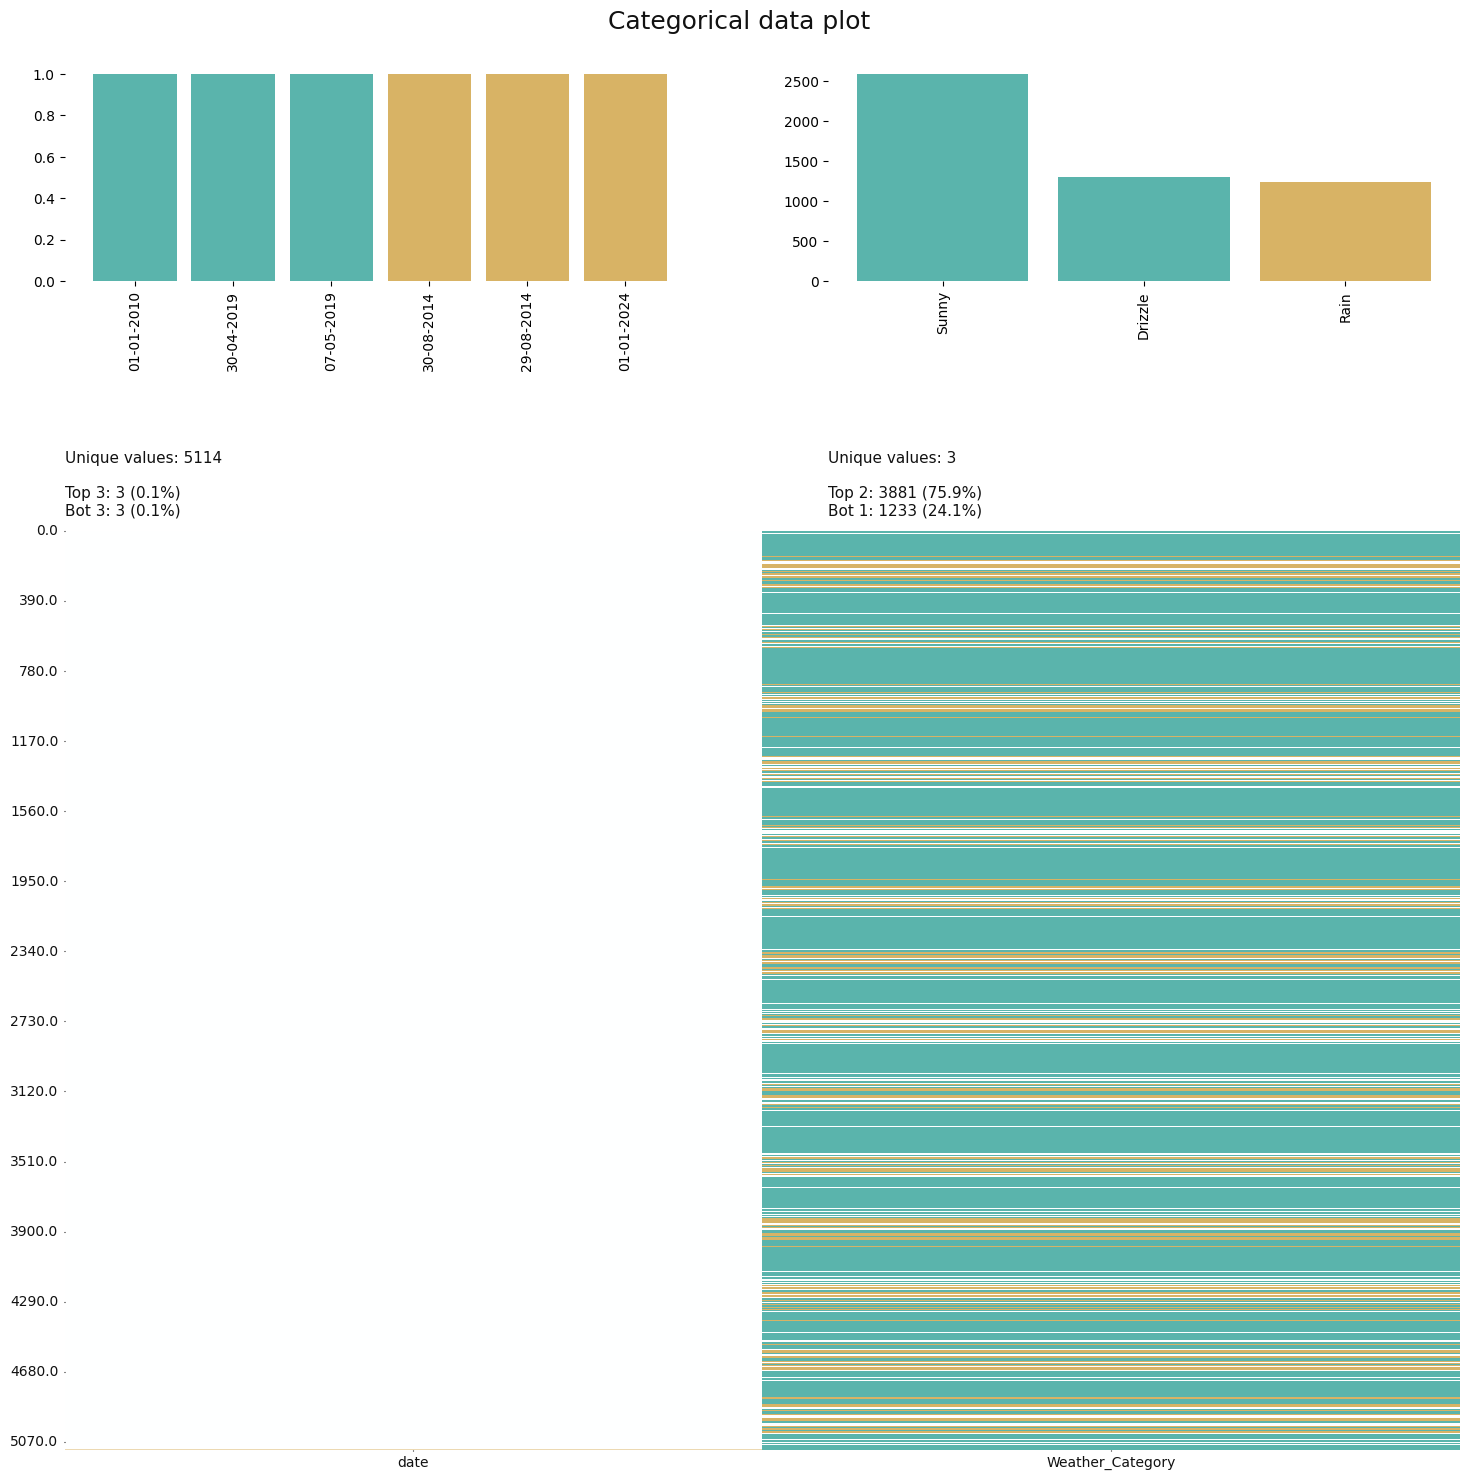

In [ ]:
klib.cat_plot(df)

In [ ]:
# @title Default title text
klib.corr_mat(df)

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max
weather_code,1.00,-0.24,0.43,0.07,0.06,0.46,0.42,0.42,0.70,0.15
temperature_2m_max,-0.24,1.00,0.53,0.88,0.89,0.52,-0.30,-0.30,-0.43,0.18
temperature_2m_min,0.43,0.53,1.00,0.86,0.73,0.97,0.13,0.13,0.24,0.39
temperature_2m_mean,0.07,0.88,0.86,1.00,0.92,0.82,-0.12,-0.12,-0.14,0.31
apparent_temperature_max,0.06,0.89,0.73,0.92,1.00,0.77,-0.15,-0.15,-0.19,0.09
apparent_temperature_min,0.46,0.52,0.97,0.82,0.77,1.00,0.12,0.12,0.25,0.26
precipitation_sum,0.42,-0.30,0.13,-0.12,-0.15,0.12,1.00,1.00,0.70,0.19
rain_sum,0.42,-0.30,0.13,-0.12,-0.15,0.12,1.00,1.00,0.70,0.19
precipitation_hours,0.70,-0.43,0.24,-0.14,-0.19,0.25,0.70,0.70,1.00,0.20
wind_speed_10m_max,0.15,0.18,0.39,0.31,0.09,0.26,0.19,0.19,0.20,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

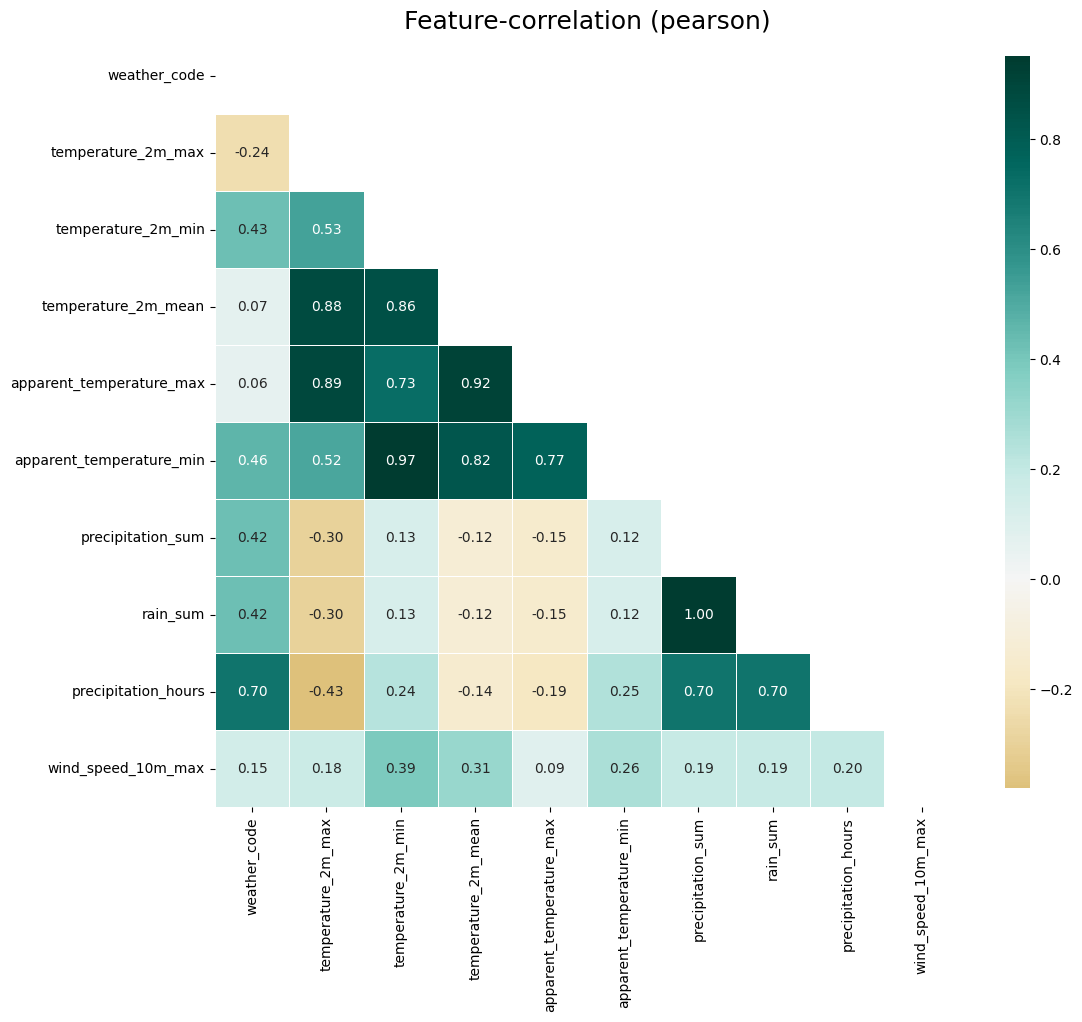

In [ ]:
klib.corr_plot(df)

<Axes: xlabel='weather_code', ylabel='Density'>

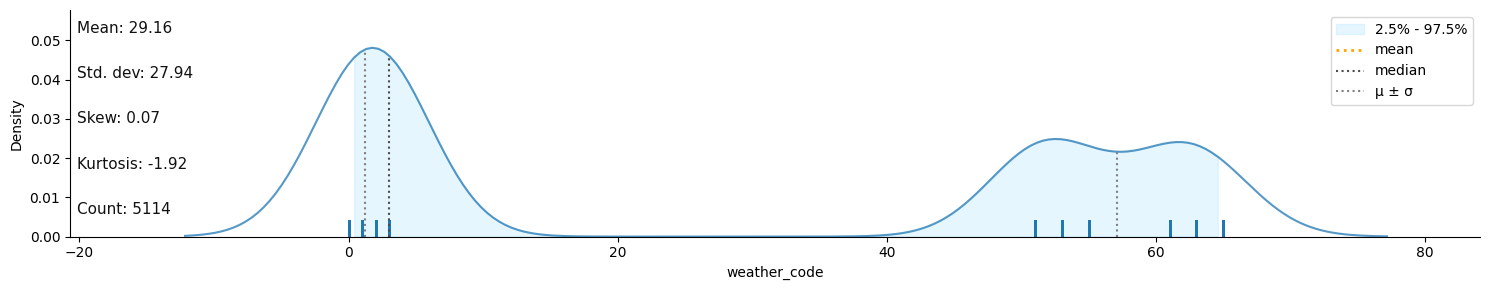

In [ ]:
klib.dist_plot(df)

In [ ]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [ ]:
df_clean=klib.data_cleaning(df)

Shape of cleaned data: (5114, 12) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.26 MB (-55.32%)



In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   date                      5114 non-null   string  
 1   weather_code              5114 non-null   int8    
 2   temperature_2m_max        5114 non-null   float32 
 3   temperature_2m_min        5114 non-null   float32 
 4   temperature_2m_mean       5114 non-null   float32 
 5   apparent_temperature_max  5114 non-null   float32 
 6   apparent_temperature_min  5114 non-null   float32 
 7   precipitation_sum         5114 non-null   float32 
 8   rain_sum                  5114 non-null   float32 
 9   precipitation_hours       5114 non-null   int8    
 10  wind_speed_10m_max        5114 non-null   float32 
 11  weather_category          5114 non-null   category
dtypes: category(1), float32(8), int8(2), string(1)
memory usage: 215.0 KB


**DATA CLEANING USING NORMALIZATION**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/eluru_weather_data_with_category.csv')
print(data)

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data)


            date  weather_code  temperature_2m_max  temperature_2m_min  \
0     01-01-2010             1           30.237000           19.286999   
1     02-01-2010             2           28.437000           18.737000   
2     03-01-2010             1           28.536999           17.587000   
3     04-01-2010             0           29.286999           17.937000   
4     05-01-2010             1           31.137000           17.786999   
...          ...           ...                 ...                 ...   
5109  28-12-2023             2           29.973501           19.423500   
5110  29-12-2023             3           29.873500           19.173500   
5111  30-12-2023             0           29.523500           18.773500   
5112  31-12-2023             1           29.923500           18.273500   
5113  01-01-2024             3           30.123500           18.423500   

      temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0               24.249498     

**FEATURE SELECTION USING RECURSIVE FEATURE ELIMINATION(RFE)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/eluru_weather_data_with_category.csv')

# Drop 'Weather_Category', 'apparent_temperature_min', and 'weather_code' columns
X = df.drop(columns=['Weather_Category', 'weather_code'])
y = df['Weather_Category']

# Separate the 'date' column for further processing
dates = X['date']
X = X.drop(columns=['date'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the 'date' column using LabelEncoder
date_encoder = LabelEncoder()
dates_encoded = date_encoder.fit_transform(dates)

# Concatenate the encoded 'date' column with the scaled numerical features
X_processed = np.hstack((X_scaled, dates_encoded.reshape(-1, 1)))

# Initialize the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Set random seed for reproducibility
np.random.seed(42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=clf, n_features_to_select=5)
X_selected = rfe.fit_transform(X_processed, y)

# Get the indices of selected features
selected_features_indices = rfe.get_support(indices=True)

# Get the selected features' names
selected_features = list(X.columns[selected_features_indices]) + ['date']

# Replace 'precipitation_hours' with 'wind_speed_10m_max' in the selected features
selected_features.remove('precipitation_hours')
selected_features.append('wind_speed_10m_max')

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

# Split the dataset into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_processed[:, selected_features_indices], y, test_size=0.2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set:", accuracy)

# Save the dataset with selected features
df_selected_features = df[selected_features + ['Weather_Category']]
df_selected_features.to_csv('selected_features_dataset.csv', index=False)


Selected Features:
temperature_2m_max
temperature_2m_min
precipitation_sum
rain_sum
date
wind_speed_10m_max
Accuracy on testing set: 0.9775171065493646


**FEATURE SELECTION USING (RIDGE)L2 REGULARIZATION**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/eluru_weather_data_with_category.csv')

# Drop irrelevant columns
df = df.drop(['weather_code', 'date'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the dataset into features and target variable
X = df.drop(columns=['Weather_Category'])  # Features
y = df['Weather_Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with L2 (Ridge) regularization
model = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model
model.fit(X_train_scaled, y_train)

# Use SelectFromModel to select features based on importance
sfm = SelectFromModel(model, prefit=True)

# Transform both training and testing datasets
X_train_ridge = sfm.transform(X_train_scaled)
X_test_ridge = sfm.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[sfm.get_support()]

# Print selected features
print("Selected Features:", selected_features)

# Train the model on the transformed training set
model.fit(X_train_ridge, y_train)

# Predict the target variable on the transformed testing set
y_test_pred_ridge = model.predict(X_test_ridge)

# Print the accuracy of the model
print("Accuracy on testing set (Ridge):", accuracy_score(y_test, y_test_pred_ridge))


Selected Features: Index(['precipitation_sum', 'rain_sum', 'precipitation_hours'], dtype='object')
Accuracy on testing set (Ridge): 0.884652981427175


In [ ]:
import pandas as pd

# Assuming the CSV file is located at '/content/eluru_weather_data_with_category.csv'
df = pd.read_csv('/content/eluru_weather_data_with_category.csv')

# Display the column names
print(df.columns)


Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'wind_speed_10m_max', 'Weather_Category'],
      dtype='object')


In [ ]:
import pandas as pd
#new dataset that consists of selected features
new_df=pd.read_csv('/content/selected_features_dataset.csv')
print(new_df)

      temperature_2m_max  temperature_2m_min  precipitation_sum  rain_sum  \
0              30.237000           19.286999                0.0       0.0   
1              28.437000           18.737000                0.0       0.0   
2              28.536999           17.587000                0.0       0.0   
3              29.286999           17.937000                0.0       0.0   
4              31.137000           17.786999                0.0       0.0   
...                  ...                 ...                ...       ...   
5109           29.973501           19.423500                0.0       0.0   
5110           29.873500           19.173500                0.0       0.0   
5111           29.523500           18.773500                0.0       0.0   
5112           29.923500           18.273500                0.0       0.0   
5113           30.123500           18.423500                0.0       0.0   

            date  wind_speed_10m_max Weather_Category  
0     01-01-2010   

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

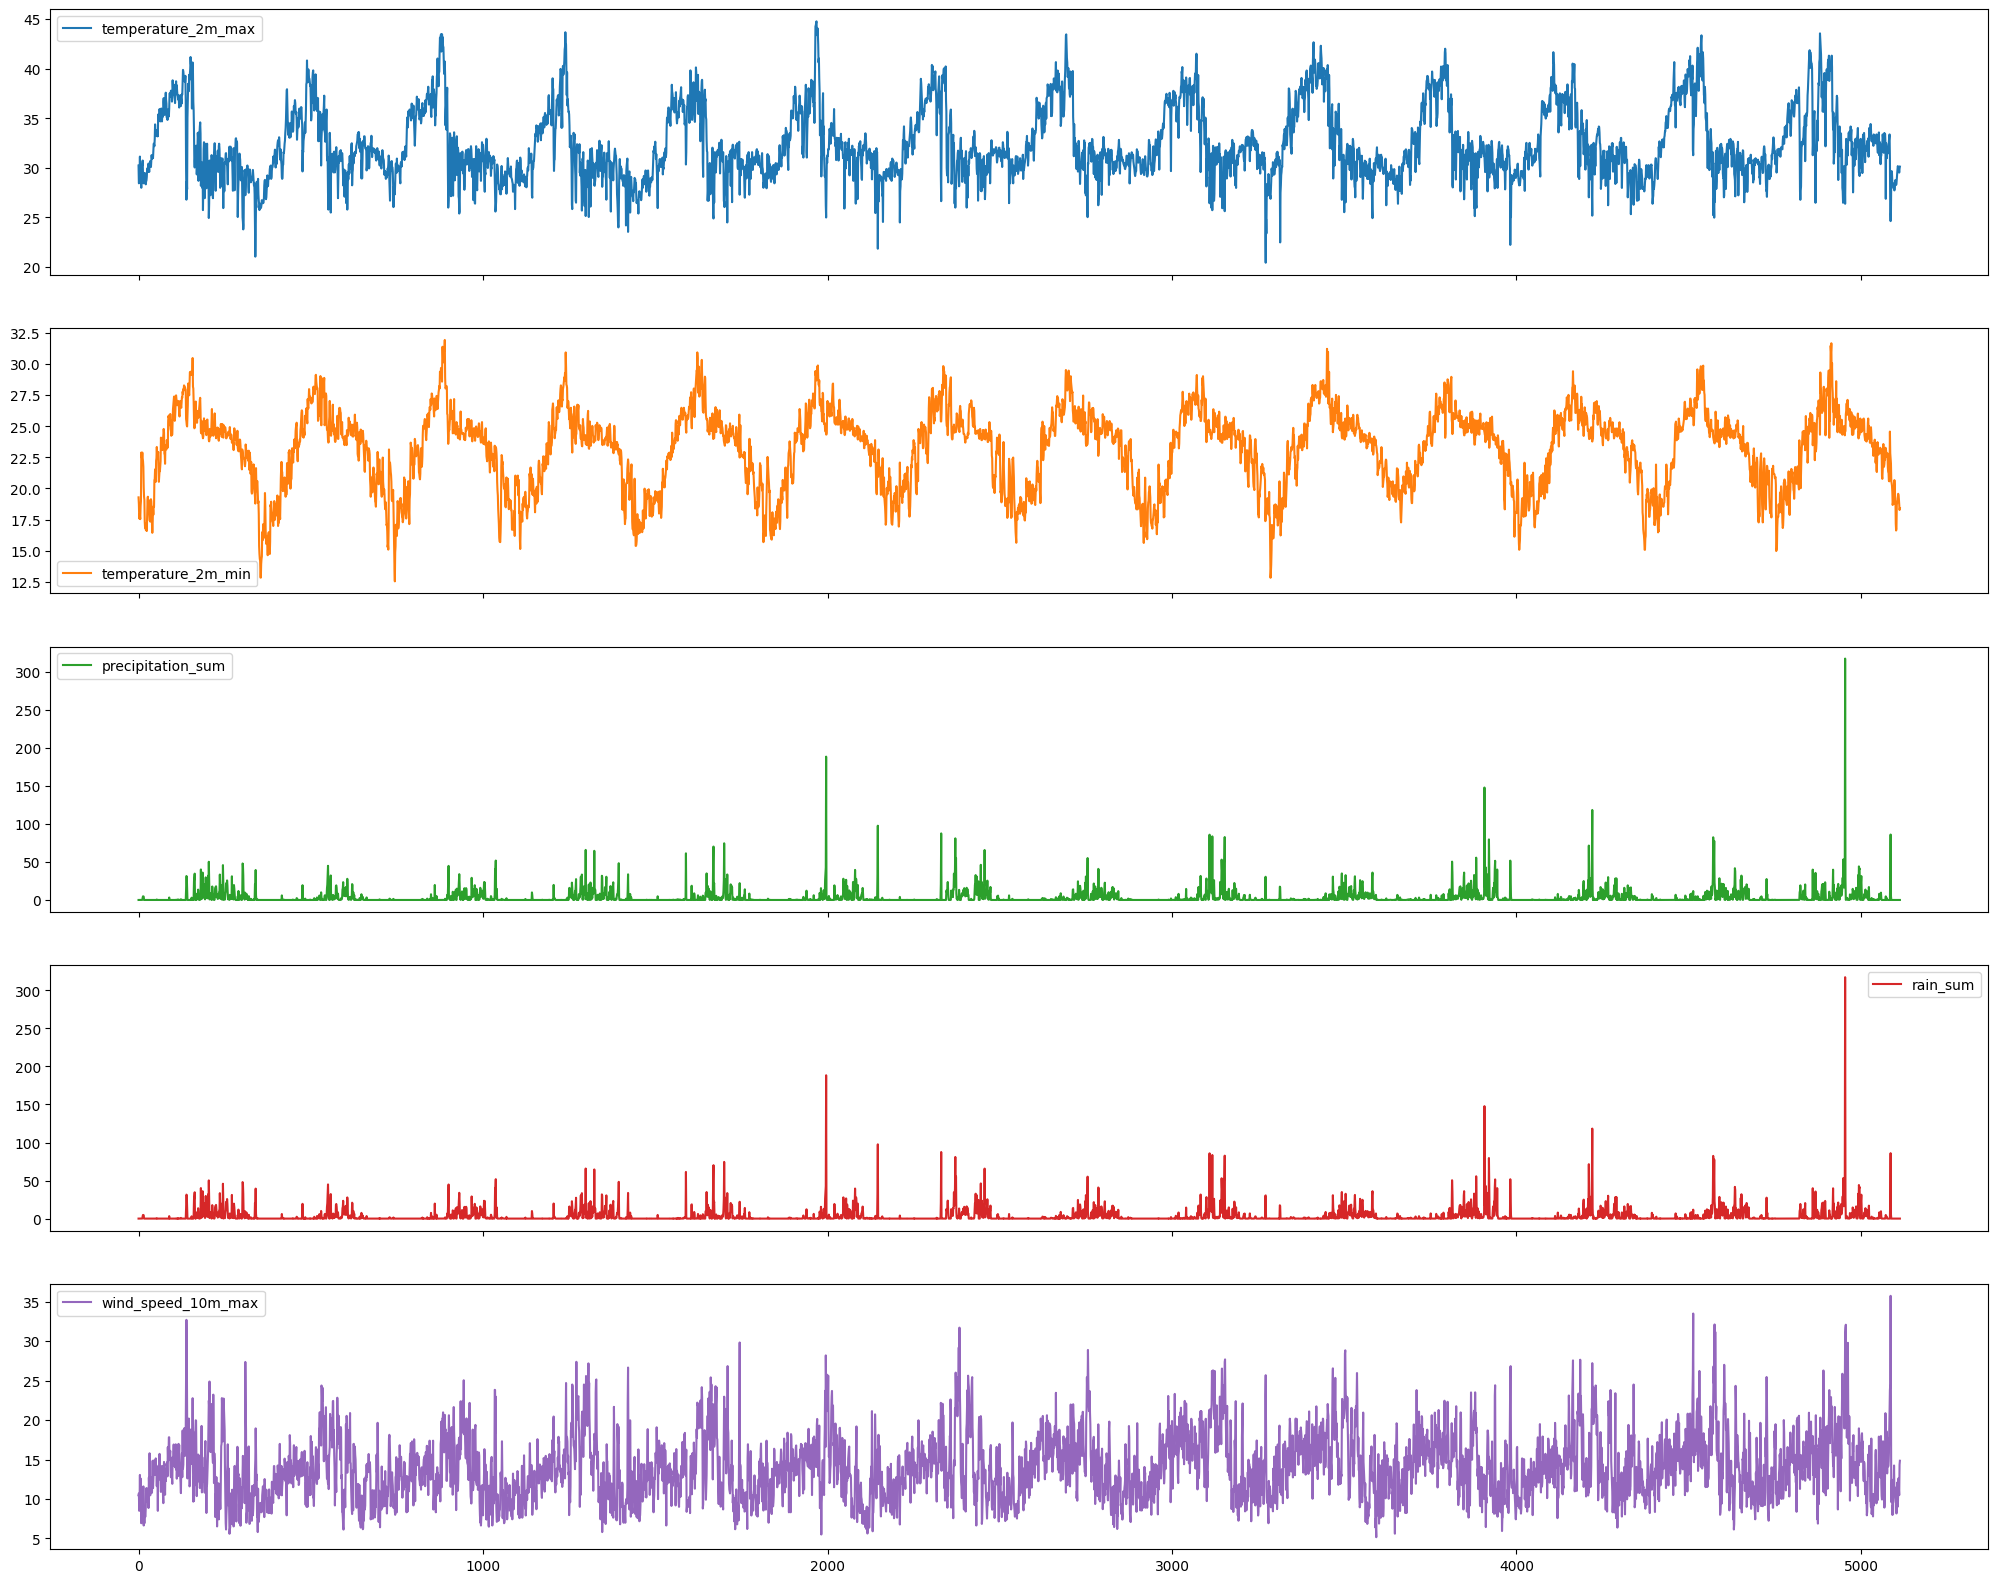

In [ ]:
new_df.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'temperature_2m_max'}>,
        <Axes: title={'center': 'temperature_2m_min'}>],
       [<Axes: title={'center': 'precipitation_sum'}>,
        <Axes: title={'center': 'rain_sum'}>],
       [<Axes: title={'center': 'wind_speed_10m_max'}>, <Axes: >]],
      dtype=object)

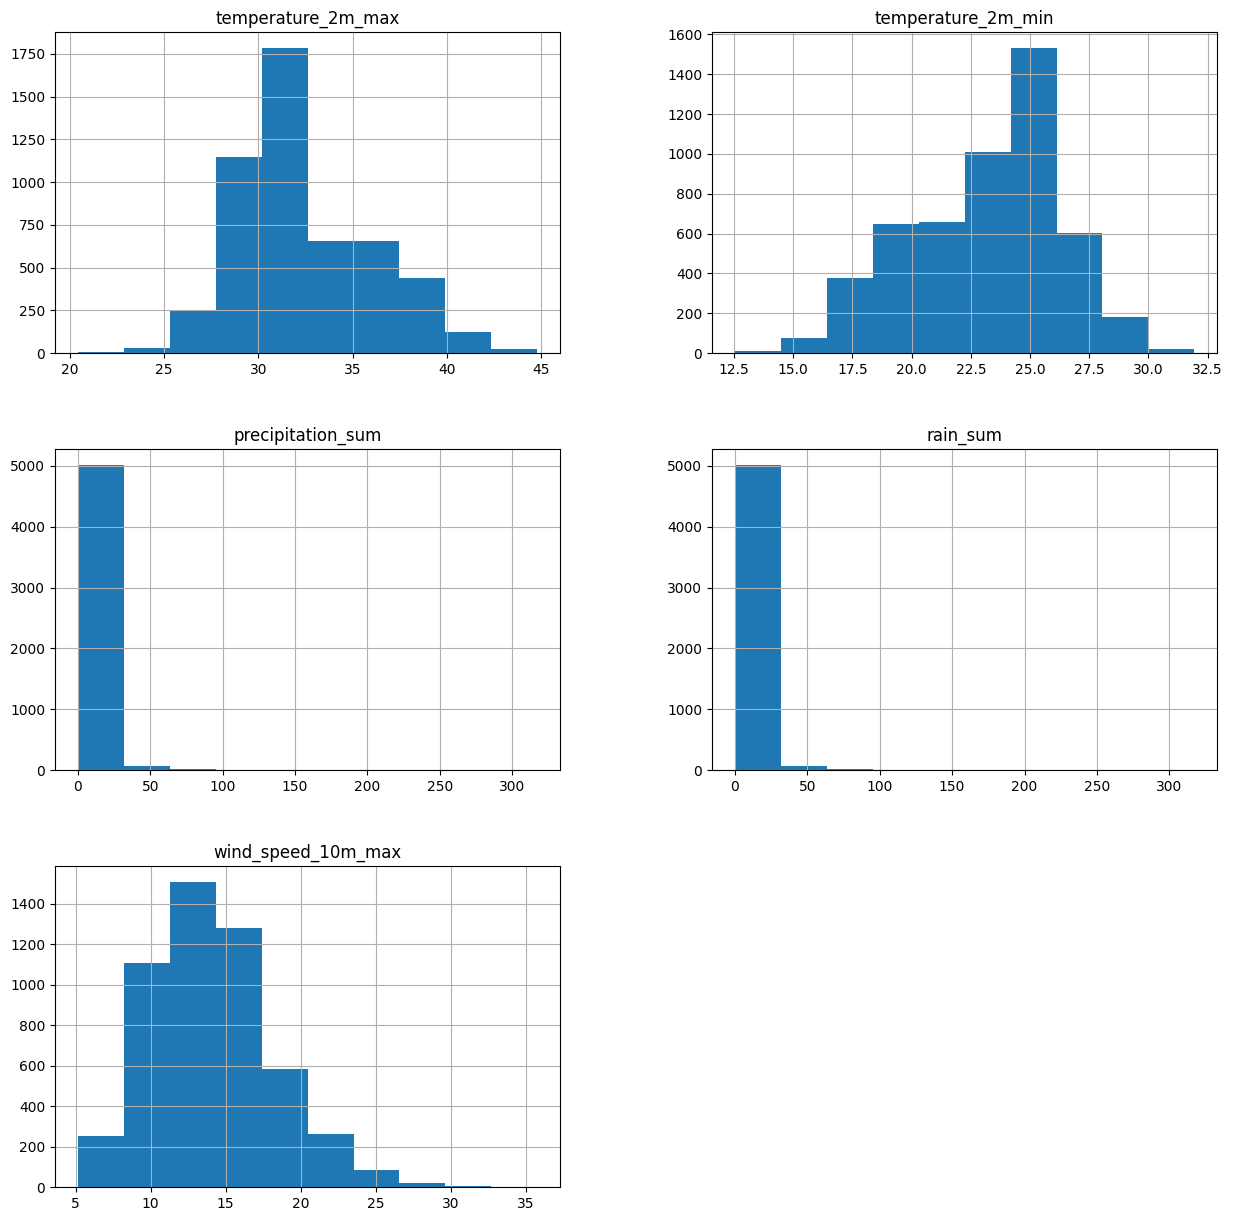

In [ ]:
new_df.hist(bins=10,figsize=(15,15))

**REGRESSION MODELS TO PREDICT THE ACCURACY BASED ON SOME METRICS**

LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')

# Convert the 'date' column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract year, month, and day features from the 'date' column
new_df['year'] = new_df['date'].dt.year
new_df['month'] = new_df['date'].dt.month
new_df['day'] = new_df['date'].dt.day

# Drop the original 'date' column
new_df = new_df.drop(columns=['date'])

# Encode the target variable 'Weather_Category' into numerical format
label_encoder = LabelEncoder()
new_df['Weather_Category'] = label_encoder.fit_transform(new_df['Weather_Category'])

# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2-score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 0.5614536988196002
R2-score: 0.30647430453949287
Mean Squared Error (MSE): 0.4831033053475829


<ipython-input-8-8f47e9d8c126>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['date'] = pd.to_datetime(new_df['date'])


DECISION TREE REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the selected features dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')

# Convert 'date' column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract features from the 'date' column
new_df['year'] = new_df['date'].dt.year
new_df['month'] = new_df['date'].dt.month
new_df['day'] = new_df['date'].dt.day

# Drop the original 'date' column
new_df.drop(columns=['date'], inplace=True)

# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Train the model
regressor.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 0.047898338220918865
R2-score: 0.9312388717726425
Mean Squared Error (MSE): 0.047898338220918865


<ipython-input-11-e28162c073e6>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['date'] = pd.to_datetime(new_df['date'])


RANDOM FOREST REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the selected features dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')
# Convert 'date' column to datetime format
new_df['date'] = pd.to_datetime(new_df['date'])

# Extract features from the 'date' column
new_df['year'] = new_df['date'].dt.year
new_df['month'] = new_df['date'].dt.month
new_df['day'] = new_df['date'].dt.day

# Drop the original 'date' column
new_df.drop(columns=['date'], inplace=True)


# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
regressor = RandomForestRegressor()

# Train the model
regressor.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R2-score:", r2)
print("Mean Squared Error (MSE):", mse)


<ipython-input-29-345a25198f97>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['date'] = pd.to_datetime(new_df['date'])


Mean Absolute Error (MAE): 0.04485826001955035
R2-score: 0.9679209690782742
Mean Squared Error (MSE): 0.02234594330400782


**PLOTTING BETWEEN MAXIMUM AND MINIMUM TEMPERATURES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/selected_features_dataset.csv')

# Split the dataset into features (max temperature) and target variable (min temperature)
X = df[['temperature_2m_max']]
y = df['temperature_2m_min']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LINEAR REGRESSION

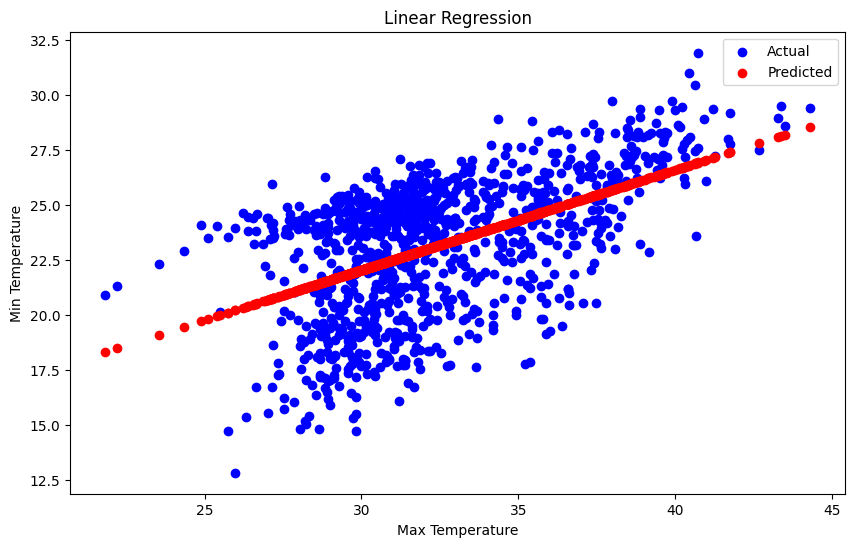

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plot Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, lr_predictions, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.legend()
plt.show()

DECISION TREE REGRESSION

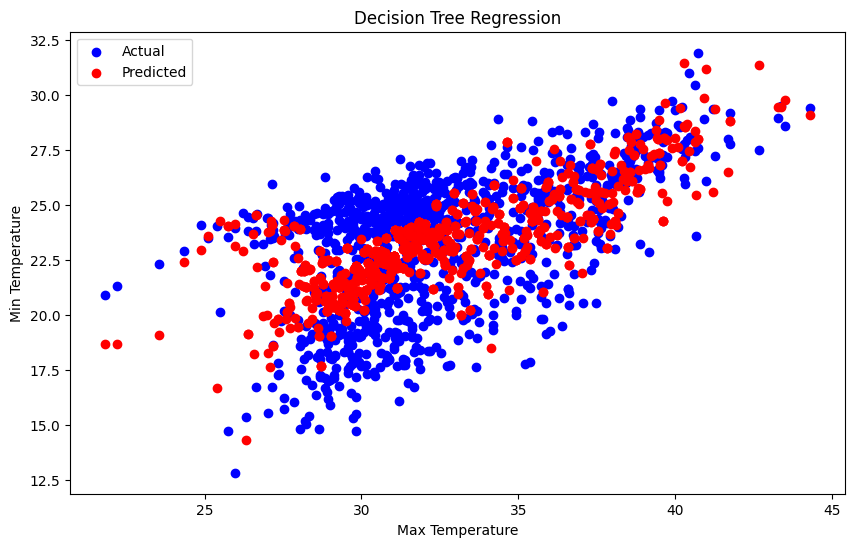

In [ ]:
# Train Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Plot Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, dt_predictions, color='red', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.legend()
plt.show()

RANDOM FOREST REGRESSION

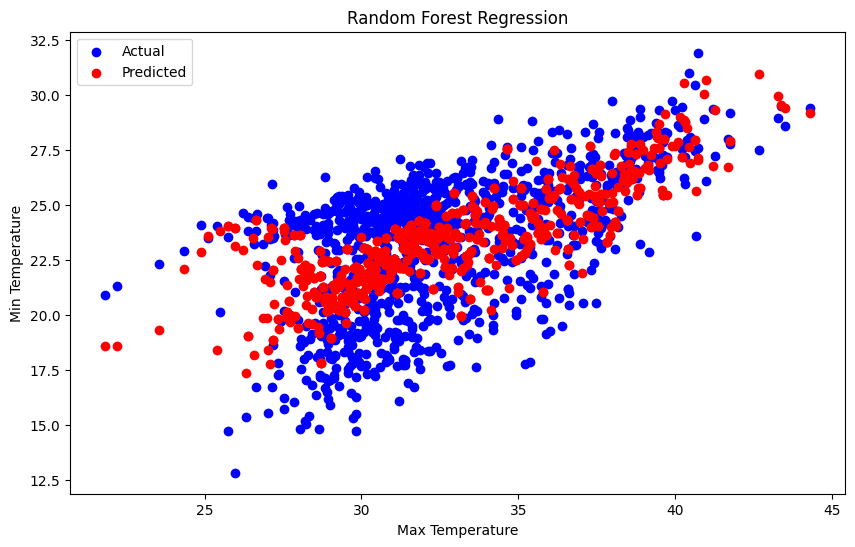

In [ ]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Plot Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, rf_predictions, color='red', label='Predicted')
plt.title('Random Forest Regression')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.legend()
plt.show()

### **CLASSIFICATION MODELS TO PREDICT THE ACCURACY BASED ON SOME METRICS**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
np.random.seed(42)
# Load the selected features dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')

# Drop the 'date' column
new_df = new_df.drop(columns=['date'])

# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Classifier (SVC)
classifier = SVC()
classifier.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Mean Squared Error (MSE):", mse)


Accuracy: 0.8670576735092864
Precision: 0.8818114702760839
Recall: 0.8228483956625005
F1 Score: 0.8393459902352985
Mean Squared Error (MSE): 0.43499511241446726


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
np.random.seed(42)
# Load the selected features dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')

# Drop the 'date' column
new_df = new_df.drop(columns=['date'])

# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Mean Squared Error (MSE):", mse)


Accuracy: 0.9648093841642229
Precision: 0.9512460443037974
Recall: 0.9512460443037974
F1 Score: 0.9512460443037974
Mean Squared Error (MSE): 0.03519061583577713


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
np.random.seed(42)
# Load the selected features dataset
new_df = pd.read_csv('/content/selected_features_dataset.csv')

# Drop the 'date' column
new_df = new_df.drop(columns=['date'])

# Split the dataset into features and target variable
X = new_df.drop('Weather_Category', axis=1)
y = new_df['Weather_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Mean Squared Error (MSE):", mse)


Accuracy: 0.9716520039100685
Precision: 0.9606909430438842
Recall: 0.9607781733473981
F1 Score: 0.9607319669035602
Mean Squared Error (MSE): 0.028347996089931573
